In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from keras.regularizers import l2

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

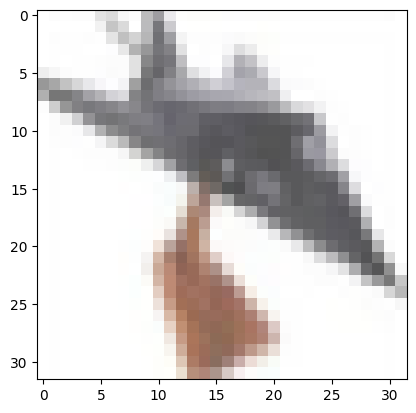

In [5]:
plt.imshow(x_test[215])

# L1, L2 test

In [6]:
batch_size = 256

In [7]:
model_cnn_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model_cnn_0.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["sparse_categorical_accuracy"])

In [9]:
history_cnn_0 = model_cnn_0.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3812 - sparse_categorical_accuracy: 0.5023
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8978 - sparse_categorical_accuracy: 0.6845
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7213 - sparse_categorical_accuracy: 0.7489
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6067 - sparse_categorical_accuracy: 0.7882
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.5046 - sparse_categorical_accuracy: 0.8215
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.4200 - sparse_categorical_accuracy: 0.8518
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.3423 - sparse_categorical_accuracy: 0.8781
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.2782 - sparse_categorical_accuracy: 0.9009
Epoch 9/10
1563/

In [33]:
model_cnn_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.02)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.02)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.02)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.02)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1(0.02))
])

In [34]:
model_cnn_1.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["sparse_categorical_accuracy"])

In [35]:
history_cnn_1 = model_cnn_1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 34ms/step - loss: 6.6529 - sparse_categorical_accuracy: 0.0965
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 3.7650 - sparse_categorical_accuracy: 0.0959
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 3.7649 - sparse_categorical_accuracy: 0.0983
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 3.7648 - sparse_categorical_accuracy: 0.0989
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 3.7647 - sparse_categorical_accuracy: 0.0969
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 3.7646 - sparse_categorical_accuracy: 0.0996
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 3.7644 - sparse_categorical_accuracy: 0.0991
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 3.7644 - sparse_categorical_accuracy: 0.0992
Epoch 9/10
1563/

In [24]:
model_cnn_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

In [25]:
model_cnn_2.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["sparse_categorical_accuracy"])

In [26]:
history_cnn_2 = model_cnn_2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 2.0041 - sparse_categorical_accuracy: 0.3526
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.7339 - sparse_categorical_accuracy: 0.4292
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6574 - sparse_categorical_accuracy: 0.4683
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6094 - sparse_categorical_accuracy: 0.4922
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5739 - sparse_categorical_accuracy: 0.5065
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5529 - sparse_categorical_accuracy: 0.5180
Epoch 7/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.5220 - sparse_categorical_accuracy: 0.5339
Epoch 8/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.5018 - sparse_categorical_accuracy: 0.5423
Epoch 9/10
1563/

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_cnn_0.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_1.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_2.history['sparse_categorical_accuracy'])
plt.title('CNN: model accuracy with different regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['L2', 'L1', 'No regularization'], loc='upper left')
plt.show()

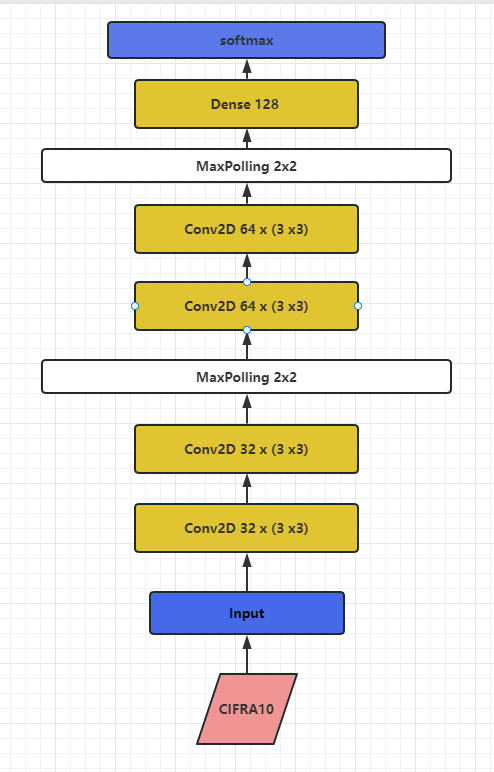

# Dropout test

In [59]:
model_cnn_2_drop = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Dropout(0.3,noise_shape=None,seed=None),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Dropout(0.3,noise_shape=None,seed=None),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Dropout(0.3,noise_shape=None,seed=None),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Dropout(0.3,noise_shape=None,seed=None),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3,noise_shape=None,seed=None),
    tf.keras.layers.Dense(units=128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

In [60]:
model_cnn_2_drop.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["accuracy"])

In [61]:
history_cnn_2_drop = model_cnn_2_drop.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 84s 54ms/step - loss: 2.4223 - accuracy: 0.0974
Epoch 2/20
1563/1563 [==============================] - 84s 54ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 3/20
1563/1563 [==============================] - 84s 54ms/step - loss: 2.3027 - accuracy: 0.0998
Epoch 4/20
1563/1563 [==============================] - 84s 54ms/step - loss: 2.3028 - accuracy: 0.0999
Epoch 5/20
1563/1563 [==============================] - 84s 54ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 6/20
1563/1563 [==============================] - 84s 54ms/step - loss: 2.3028 - accuracy: 0.0989
Epoch 7/20
1563/1563 [==============================] - 84s 54ms/step - loss: 2.3028 - accuracy: 0.0974
Epoch 8/20
1563/1563 [==============================] - 85s 54ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 9/20
1563/1563 [==============================] - 85s 55ms/step - loss: 2.3028 - accuracy: 0.0961
Epoch 10/20
1563/1563 [==============================] - 84s 54m

In [62]:
model_cnn_2_nodrop = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

In [63]:
model_cnn_2_nodrop.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["accuracy"])

In [ ]:
history_cnn_2_nodrop = model_cnn_2_nodrop.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 81s 52ms/step - loss: 2.4120 - accuracy: 0.0988
Epoch 2/20
 129/1563 [=>............................] - ETA: 1:13 - loss: 2.3028 - accuracy: 0.1027

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_cnn_2_nodrop.history['accuracy'])
plt.plot(history_cnn_2_drop.history['accuracy'])
plt.title('CNN: model accuracy with dropout regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['No dropout', 'dropout'], loc='upper left')
plt.show()

In [ ]:
print(history_cnn_2_nodrop.history.keys())

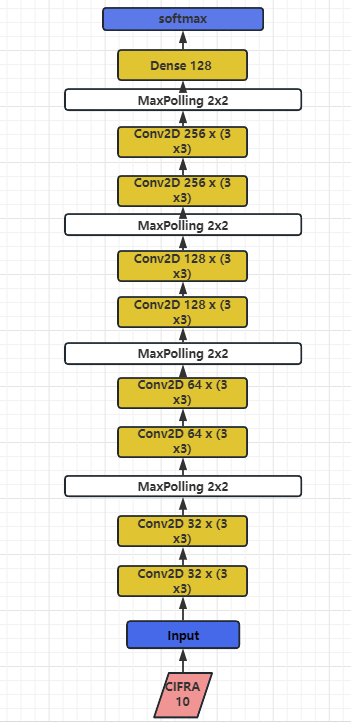